In [1]:
import sys
print(sys.version)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'svg' # Makes the images look nice

from qiskit import(
  QuantumCircuit,
  QuantumRegister, ClassicalRegister,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

3.7.5 (v3.7.5:5c02a39a0b, Dec 27 2019, 11:41:00) 
[GCC 6.3.0 20170516]


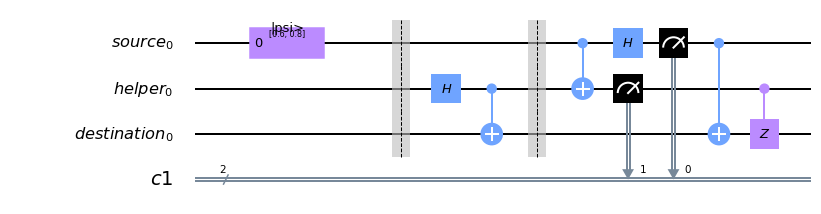

In [4]:
# draw the left side of the above equation
source = QuantumRegister(1, "source")
helper = QuantumRegister(1, "helper")
destination = QuantumRegister(1, "destination")
cbits = ClassicalRegister(2)
c = QuantumCircuit(source, helper, destination, cbits)

## initialize state
alpha = 3/5
beta = 4/5
initial_state = [alpha, beta]
c.initialize(initial_state, source)

c.barrier()

## initialize entanglement
c.h(helper)
c.cx(helper, destination)

c.barrier()

## teleportation
c.cx(source, helper)
c.h(source)
# measure source
c.measure(source, cbits[0])
c.cx(source, destination)
# measure helper
c.measure(helper, cbits[1])
c.cz(helper, destination)

c.draw(output="mpl")
# c.draw(output="text")

In [3]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(c, simulator)
result = job.result()
outputstate = result.get_statevector(c, decimals=3)
outputstate

array([0.6+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.8-0.j, 0. +0.j, 0. +0.j,
       0. +0.j])